<a href="https://colab.research.google.com/github/earthspecies/open_collaboration_on_audio_classification/blob/master/TEMPLATE-copy_this_please.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
import sys
if 'google.colab' in sys.modules:
  !pip install git+git://github.com/fastai/fastai2.git
  !pip install torchaudio

from fastai2.vision.all import *
import torchaudio
import librosa

In [0]:
path = untar_data('https://storage.googleapis.com/ml-animal-sounds-datasets/macaques_24414Hz.zip')

def get_items(path): return get_files(path)

def get_y(path): return path.parent.stem

def get_x(path, target_rate=24414, num_samples=18310):
    x, rate = torchaudio.load_wav(path)
    if rate != target_rate: 
      x = torchaudio.transforms.Resample(orig_freq=rate, new_freq=24414, resampling_method='sinc_interpolation')(x)
    x = x[0] / 32767
    x = x.numpy()
    x = librosa.util.fix_length(x, num_samples)
    spec = librosa.feature.melspectrogram(x, sr=rate, n_fft=1024, hop_length=140)
    spec = spec / spec.max() * 255 # we want the range of values for our data to be [0, 255]
                                   # this way fastai internally will be able to represent it as an image using PIL
    return spec.astype(np.uint8)

In [0]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_items,
    get_x=get_x,
    get_y=get_y,
    splitter=RandomSplitter(seed=42))

In [0]:
dls = db.dataloaders(path, num_workers=12)

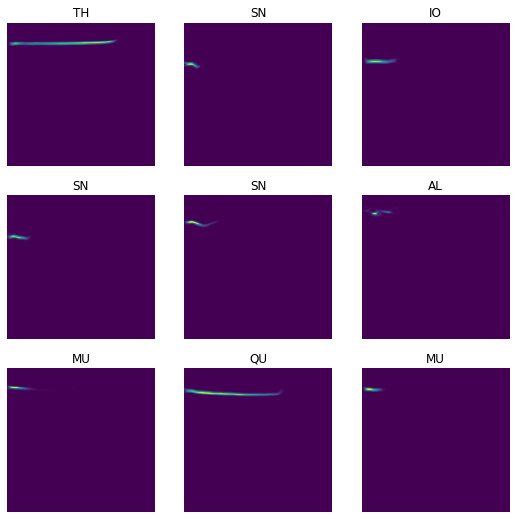

In [0]:
dls.show_batch()

In [0]:
# learn = cnn_learner(dls, resnet18, metrics=error_rate)
# learn.fine_tune(1)

In [0]:
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix(figsize=(12,12), dpi=60)